# Sum of Random Variables

<a href="#Binomial-Distribution">Binomial Distribution</a>

<a href="#1D-Simple-Random-Walk">1D Simple Random Walk</a>

<a href="#2D-Simple-Random-Walk">2D Simple Random Walk</a>

<a href="#Negative-Binomial-Distribution">Negative Binomial Distribution</a>

<a href="#Unbiased-Estimator">Unbiased Estimator</a>

<a href="#Hypergeometric-Distribution">Hypergeometric Distribution</a>

<a href="#Examples">Examples</a>

# Binomial Distribution

Flip a $p$-coin $n$ times independently and count the number $S$ of heads.
Let $A_i$ be the event that the $i$-th $p$-coin lands on head
and let $1_{A_i}$ be its indicator.

$$
1_{A_i}\ \mbox{iid}\ B(p)\ \ \Rightarrow\ \ 
S=\sum_{i=1}^n1_{A_i}\sim B(n,p)
$$

##### Mean

$$
\mathbb{E}S=\sum_{i=1}^n\mathbb{E}1_{A_i}=np
$$

##### Variance

$$
Var(S)=\sum_{i=1}^nVar(1_{A_i})=npq
$$

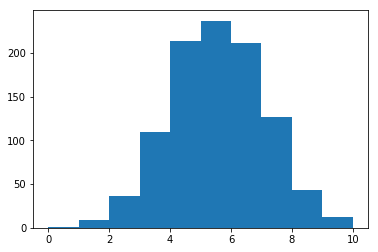

$P(X=k)$ estimation:  0.237
$P(X=k)$:  0.24609375


In [3]:
# Simulation of Binomial Random Variables

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss

# B(n,p)
n = 10
p = 0.5

n_simulation = 1000
k = 5

x = np.random.binomial(n, p, (n_simulation,))

plt.hist(x)
plt.show()

Probab_k_by_simulation = sum(x==k) / n_simulation
print("$P(X=k)$ estimation: ", Probab_k_by_simulation)

Probab_k_by_exact_computation = ss.comb(n,k) * (p**k) * ((1-p)**(n-k))
print("$P(X=k)$: ", Probab_k_by_exact_computation)

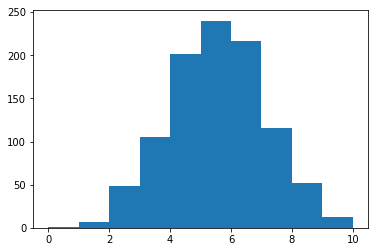

$P(X=k)$ estimation:  0.24
$P(X=k)$:  0.24609375


In [2]:
# Simulation of Binomial Random Variables via Bernoulli Random Variables 

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss

# B(n,p)
n = 10
p = 0.5

n_simulation = 1000
k = 5

a = np.random.binomial(1, p, (n,n_simulation))
x = np.sum(a, axis=0)

plt.hist(x)
plt.show()

Probab_k_by_simulation = sum(x==k) / n_simulation
print("$P(X=k)$ estimation: ", Probab_k_by_simulation)

Probab_k_by_exact_computation = ss.comb(n,k) * (p**k) * ((1-p)**(n-k))
print("$P(X=k)$: ", Probab_k_by_exact_computation)

[<a href="#Sum-of-Random-Variables">Back to top</a>]

# 1D Simple Random Walk

$$
S_n=\sum_{i=1}^nX_i
$$
where $X_i$ are iid with
$$
X_i=\left\{\begin{array}{rl}
1&\mbox{with probability 0.5}\\
-1&\mbox{with probability 0.5}
\end{array}\right.
$$

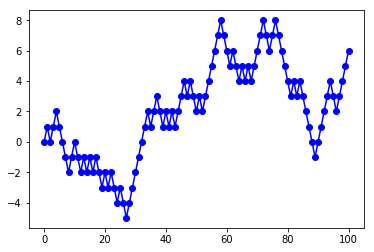

In [4]:
# 1D Simple Random Walk Simulation

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(337)

N_STEPS = 100 # number of steps in simulation
PROB_UP = 0.5

UP = 1
DOWN = -1

x = [0]
t = [0]
for step in range(N_STEPS):
    if np.random.uniform(0, 1, (1,)) >  1-PROB_UP:
        dx = UP
    else:
        dx = DOWN
    x.append(x[-1]+dx)
    t.append(step+1)

plt.plot(t, x, 'o-b')
plt.show()

[<a href="#Sum-of-Random-Variables">Back to top</a>]

# 2D Simple Random Walk

$$
S_n=\sum_{i=1}^nX_i
$$
where $X_i$ are iid with
$$
X_i=\left\{\begin{array}{rl}
[ 0,  1]&\mbox{with probability 0.25}\\
[ 1,  0]&\mbox{with probability 0.25}\\
[-1,  0]&\mbox{with probability 0.25}\\
[ 0, -1]&\mbox{with probability 0.25}
\end{array}\right.
$$

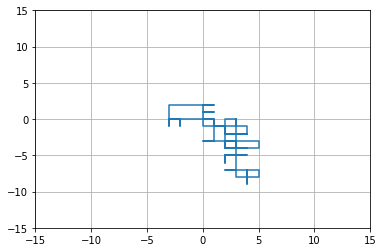

In [11]:
# 2D Simple Random Walk Simulation

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(337)

N_STEPS = 100 # number of steps in simulation

# define NEWS steps
N = [ 0,  1]
E = [ 1,  0]
W = [-1,  0]
S = [ 0, -1]

# 2D simple random walk
x = [0]
y = [0]
for step in range(N_STEPS):
    dx, dy = random.choice([N, E, W, S])
    x.append(x[-1]+dx)
    y.append(y[-1]+dy)

# plot of 2D simple random walk
plt.plot(x, y, '-')
plt.axis([-1.5*np.sqrt(N_STEPS), 1.5*np.sqrt(N_STEPS), -1.5*np.sqrt(N_STEPS), 1.5*np.sqrt(N_STEPS)])
plt.grid(True)
plt.show()

[<a href="#Sum-of-Random-Variables">Back to top</a>]

# Negative Binomial Distribution

Flip a $p$-coin until we have the $r$-th head
and count the number $S$ of flips.
Let $X_i$ be the number of flips 
to have the $i$-th head after I have the $(i-1)$-th head.

$$
X_i\ \mbox{iid}\ Geo(p)\ \ \Rightarrow\ \ 
S=\sum_{i=1}^rX_i\sim  NB(r,p)
$$

##### Mean

$$
\mathbb{E}S=\sum_{i=1}^r\mathbb{E}X_i=\frac{r}{p}
$$

##### Variance

$$
Var(S)=\sum_{i=1}^rVar(X_i)=\frac{rq}{p^2}
$$

[<a href="#Sum-of-Random-Variables">Back to top</a>]

# Unbiased Estimator

##### Population parameter

$$\displaystyle \theta$$

##### Samples from population

$$\displaystyle X_1,X_2,\cdots,X_n\quad\mbox{iid}$$

##### Statistic

A statistic is 
any function 
$f(X_1,X_2,\cdots,X_n)$ of samples.

##### Estimator

An estimator of $\theta$ is a statistic $f(X_1,X_2,\cdots,X_n)$
used to estimate  $\theta$. 

##### Unbiased estimator

An estimator
$f(X_1,X_2,\cdots,X_n)$  of  $\theta$ is unbiased if

$$\displaystyle \mathbb{E}f(X_1,X_2,\cdots,X_n)=\theta$$ 

### Example - Unbiased estimation of mean and variance

Let $X_i$ be $n$ iid samples from a distribution with unknown mean $\mu$ and variance $\sigma^2$. Then,

\begin{eqnarray}
\mbox{Sample mean:}\quad\
&& 
\displaystyle\quad 
\bar{X}=\frac{\sum_{i=1}^nX_i}{n}\quad\quad\quad\quad\ 
\mbox{Unbiased estimator of $\mu$}\nonumber\\
\mbox{Sample variance:}
&&
\displaystyle\quad 
S^2=\frac{\sum_{i=1}^n(X_i-\bar{X})^2}{n-1}\quad
\mbox{Unbiased estimator of $\sigma^2$}\nonumber
\end{eqnarray}

$$
\displaystyle 
\mathbb{E}\bar{X}=
\frac{\sum_{i=1}^n\mathbb{E}X_i}{n}=
\mu
$$

$$
\displaystyle 
Var(\bar{X})=\frac{1}{n^2}Var\left(\sum_{i=1}^nX_i\right)=\frac{1}{n^2}\sum_{i=1}^nVar(X_i)=\frac{\sigma^2}{n}
$$


$$
\displaystyle 
(X_i-\bar{X})^2=
((X_i-\mu)-(\bar{X}-\mu))^2=
(X_i-\mu)^2+(\bar{X}-\mu)^2-2(X_i-\mu)(\bar{X}-\mu)
$$

$$
\displaystyle 
\Rightarrow\quad
\mathbb{E}(X_i-\bar{X})^2=
\sigma^2+\frac{\sigma^2}{n}-2\mathbb{E}(X_i-\mu)(\bar{X}-\mu)
$$

$$
\begin{array}
\displaystyle \mathbb{E}(X_i-\mu)(\bar{X}-\mu)&=&\displaystyle \mathbb{E}(X_i-\mu)\left(\frac{\sum_{j=1}^n(X_j-\mu)}{n}\right)\nonumber\\
&=&\displaystyle \mathbb{E}(X_i-\mu)\left(\frac{\sum_{j\neq i}(X_j-\mu)}{n}+\frac{X_i-\mu}{n}\right)\nonumber\\
&=&\displaystyle \frac{1}{n}\mathbb{E}(X_i-\mu)^2=\frac{\sigma^2}{n}\nonumber
\end{array}
$$

$$
\displaystyle 
\Rightarrow\quad
\mathbb{E}(X_i-\bar{X})^2=
\sigma^2+\frac{\sigma^2}{n}-2\mathbb{E}(X_i-\mu)(\bar{X}-\mu)=
\frac{n-1}{n}\sigma^2
$$

$$
\displaystyle 
\mathbb{E}S^2=
\frac{\sum_{i=1}^n\mathbb{E}(X_i-\bar{X})^2}{n-1}=
\sigma^2
$$

[<a href="#Sum-of-Random-Variables">Back to top</a>]

# Hypergeometric Distribution

\begin{array}{llll}
n&&\mbox{Number of samples (balls drawn) with/without replacement}\nonumber\\
m&&\mbox{Number of balls with marker $H$ in the bin}\nonumber\\
M&&\mbox{Number of balls in the bin}\nonumber
\end{array}

Take $n$ balls with or without replacement 
and
count the number $X$ or $Y$ of heads.

\begin{array}{lllllllllllllll}
\mbox{With replacement}&&X\sim B(n,p),&&\mbox{Mean}&&np,&&\mbox{Variance}&&npq\nonumber\\
\mbox{Without replacement}&&Y\sim H(n,m,M),&&\mbox{Mean}&&np,&&\mbox{Variance}&&npqf^2\nonumber
\end{array}

where

$$
p=\frac{m}{M}\quad\mbox{and}\quad f=\sqrt{\frac{M-n}{M-1}}
$$

Note

$$
f=\sqrt{\frac{M-n}{M-1}}=\left\{\begin{array}{ll}
1&\mbox{if we choose $1$ ball (It is binomial)}\\
0&\mbox{if we choose $M$ balls (No uncertainty)}
\end{array}\right.
$$

Note also

$$
f=\sqrt{\frac{M-n}{M-1}}\le 1
\quad\mbox{meaning smaller variance than the corresponding binomial}
$$

Take $n$ balls without replacement 
and
count the number $Y$ of heads.
Let $A_i$ be the event that the $i$-th chosen ball is $H$
and let $1_{A_i}$ be its indicator.
Then, $Y$ can be represented in terms of $1_{A_i}$:

$$
Y=\sum_{i=1}^n1_{A_i}\sim  H(n,m,M)
$$

where

\begin{eqnarray}
(1)&&\quad 1_{A_i}\sim  B(p)\nonumber\\ 
(2)&&\quad 1_{A_i}\ \mbox{not independent}\nonumber
\end{eqnarray}

##### Mean

$$\mathbb{E}Y=\sum_{i=1}^{n}\mathbb{E}1_{A_i}=np$$

##### Variance

$$Var(Y)=npqf^2$$

$$
\displaystyle 
\mathbb{P}(A_iA_j)=\mathbb{P}(A_i)\mathbb{P}(A_j|A_i)
=\frac{m}{M}\cdot\frac{m-1}{M-1}
=p\cdot\frac{m-1}{M-1}
=p^2\cdot\frac{(m-1)/m}{(M-1)/M}
$$

\begin{eqnarray}
\displaystyle 
Var(Y)
&=&\displaystyle \sum_{i=1}^nVar(1_{A_i})+2\sum_{1\le i<j\le n}Cov(1_{A_i},1_{A_j})\nonumber\\
&=&\displaystyle nVar(1_{A_1})+2{n\choose 2}Cov(1_{A_1},1_{A_2})\nonumber\\
&=&\displaystyle npq+2{n\choose 2}\left(p^2\cdot\frac{(m-1)/m}{(M-1)/M}-p^2\right)\nonumber\\
&=&\displaystyle npq+n(n-1)\left(p^2\cdot\frac{(m-1)/m}{(M-1)/M}-p^2\right)\nonumber\\
&=&\displaystyle np\left[q+(n-1)\left(\frac{(m-1)/m}{(M-1)/M}-1\right)p\right]\nonumber\\
&=&\displaystyle np\left[q+(n-1)\frac{-M+m}{m(M-1)}p\right]\nonumber\\
&=&\displaystyle np\left[q+(n-1)\frac{-qM}{m(M-1)}\frac{m}{M}\right]\nonumber\\
&=&\displaystyle npq\left[1+(n-1)\frac{-M}{m(M-1)}\frac{m}{M}\right]\nonumber\\
&=&\displaystyle npq\left[\frac{M-n}{M-1}\right]\nonumber\\
&=&\displaystyle npqf^2\nonumber
\end{eqnarray}

### Example - Number of aces in hands

We takes five cards out of 52 cards and count the number $X$ of aces in hands.
Compute the mean and variance of $X$.

$$\begin{array}{llll}
n=5&&\mbox{Number of balls drawn without replacement}\nonumber\\
m=4&&\mbox{Number of balls with marker $H$ in the bin}\nonumber\\
M=52&&\mbox{Number of balls in the bin}\nonumber
\end{array}$$

\begin{eqnarray}
p&=&\frac{m}{M}=\frac{4}{52}\nonumber\\
f&=&\sqrt{\frac{M-n}{M-1}}=\sqrt{\frac{52-5}{52-1}}\nonumber
\end{eqnarray}

$$\begin{array}{llll}
X&\sim &H(n,m,M)=H(5,4,52)\nonumber\\
\\
\mathbb{E}X&=&np=5*\frac{4}{52}\nonumber\\
\\
Var(X)&=&npqf^2=5*\frac{4}{52}*\left(1-\frac{4}{52}\right)*\frac{52-5}{52-1}\nonumber
\end{array}$$

[<a href="#Sum-of-Random-Variables">Back to top</a>]

# Examples

### Example - Roll Dice 1000 Times

Roll the dice 1000 times.
Each time 
we gain the face value of the roll if we have odd
and
loose the face value if even.

$$
D_i=\left\{\begin{array}{rl}
1&\mbox{with probability}\ \frac{1}{6}\\
-2&\mbox{with probability}\ \frac{1}{6}\\
3&\mbox{with probability}\ \frac{1}{6}\\
-4&\mbox{with probability}\ \frac{1}{6}\\
5&\mbox{with probability}\ \frac{1}{6}\\
-6&\mbox{with probability}\ \frac{1}{6}\\
\end{array}\right.
$$
           
To be fair we get 0.5 as an extra for each game.
           
$$
X_i=D_i+0.5\quad \mbox{iid}
$$
           
Let $S$ be the total P\&L after the 1000 games.
Then, $S$ can be represented in terms of $X_i$:
           
$$
S=\sum_{i=1}^{1000}X_i
$$
           
where
           
\begin{eqnarray}
(1)&&\quad \mathbb{E}D_i=-0.5,\quad Var(D_i)=14.9167\nonumber\\
(2)&&\quad \mathbb{E}X_i=0,\quad\quad\ \   Var(X_i)=14.9167\nonumber
\end{eqnarray}

##### Mean

$$\displaystyle  \mathbb{E}S=\sum_{i=1}^{1000}\mathbb{E}X_i=0$$

##### Variance

$$\displaystyle  Var(S)=\sum_{i=1}^{1000}Var(X_i)=14916.7$$

### Example - Coupon Collector Problem

To collect all the $n$ toys offered by Mc Donald
I start eating the happy meal hamburger.
Whenever I order the happy meal, I get a toy randomly among the $n$ different type of toys.
Let $T_n$ be the minimum number of the happy meal hamburgers that I have to order to collect all the $n$ different type of toys.
Let $\tau_i$ be the minimum number of the happy meals that I have to eat
to collect the $i$-th new toy after I get the $(i-1)$-th new toy.
Then,
$T_n$ can be represented in terms of $\tau_i$:
    
$$
\displaystyle 
T_n=\sum_{i=1}^n\tau_i
$$

where

\begin{eqnarray}
(1)&&\displaystyle\quad \tau_i\sim  Geo(\frac{N-(i-1)}{N})\nonumber\\
(2)&&\displaystyle\quad \tau_i\ \mbox{independent}\nonumber
\end{eqnarray}

##### Mean

$$
\mathbb{E}T_n=\sum_{i=1}^n\mathbb{E}\tau_i=n\left(1+\frac{1}{2}+\frac{1}{3}+\cdots+\frac{1}{n}\right)\sim  n\log n
$$

##### Variance

$$
Var(T_n)=\sum_{i=1}^nVar(\tau_i)=O(n^2)
$$

$$
Var(T_n)
=
\sum_{k=1}^n\frac{1-(k/n)}{(k/n)^2}
=
\left(\sum_{k=1}^n\frac{1}{k^2}\right)n^2
-
\left(\sum_{k=1}^n\frac{1}{k}\right)n
\approx
\frac{\pi^2}{6}n^2-n\log n
$$

### Example - Effect of Holidays on US Births

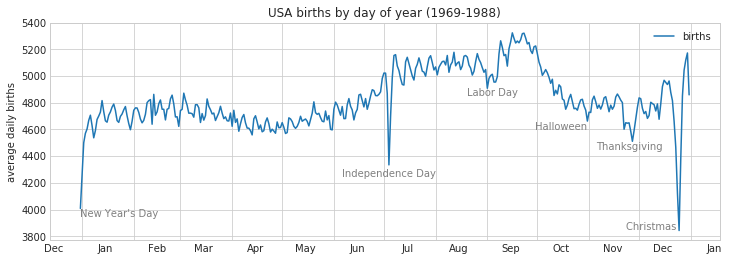

In [5]:
# code: https://github.com/jakevdp/PythonDataScienceHandbook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl; plt.style.use('seaborn-whitegrid')

# data source: https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks/data
# download births.csv from data source
# make data folder
# put births.csv into data folder 
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

plt.show()

### Example - Number of Pairs with Same Birthday

There are $n$ people in the class.
Each choose one's birthday independently and uniformly over the 365 days.
Let $S_n$ be the number of pairs with same birthday.
Let $A_{ij}$ be the event that $i$ and $j$ share the common birthday
and let $1_{A_{ij}}$ be its indicator.

$$
S_n=\sum_{1\le i<j\le n}1_{A_{ij}}\quad\mbox{is not}\quad B(m,p),\ m={n\choose 2},\ p=1/365
$$

where

\begin{eqnarray}
(1)&&\quad 1_{A_{ij}}\sim  B(p)\nonumber\\
(2)&&\quad1_{A_{ij}}\ \mbox{not independent (but pairwise independent)}\nonumber
\end{eqnarray}

##### Mean

$$\displaystyle \mathbb{E}S_n=\sum_{1\le i<j\le n}\mathbb{E}1_{A_{ij}}={n\choose 2}\cdot\frac{1}{365}$$

##### Variance

$$\displaystyle Var(S_n)=\sum_{1\le i<j\le n}Var(1_{A_{ij}})={n\choose 2}\cdot\frac{1}{365}\cdot\frac{364}{365}$$

### Example - Number of Empty Bins

There are $n$ balls and 365 bins.
Each ball choose one's bin independently and uniformly over the 365 bins
and each ball moves into the chosen bin.
Let $S_n$ be the number of overall empty bins.
Let $A_i$ be the event that the $i$th bin is empty
and let $1_{A_i}$ be its indicator.

$$
S_n=\sum_{i=1}^{365}1_{A_i}\quad\mbox{is not}\quad B(m,p),\ m=365,\ p=(364/365)^n
$$

where

\begin{eqnarray}
(1)&&\quad 1_{A_i}\sim  B(p)\nonumber\\
(2)&&\quad 1_{A_i}\ \mbox{not independent}\nonumber
\end{eqnarray}

##### Mean

$$
\displaystyle 
\mathbb{E}S_n=\sum_{i=1}^{365}\mathbb{E}1_{A_i}=365p
$$

##### Variance

$$
\displaystyle 
Var(S_n)=365 Var(1_{A_1})+2{365\choose 2}Cov(1_{A_{1}},1_{A_{2}})
$$

where

\begin{array}{llll}
\displaystyle Var(1_{A_1})&=&\displaystyle pq\nonumber\\
\displaystyle Cov(1_{A_{1}},1_{A_{2}})
&=&\displaystyle P(A_1A_2)-P(A_1)^2
=\left(\frac{363}{365}\right)^n-p^2\nonumber
\end{array}

[<a href="#Sum-of-Random-Variables">Back to top</a>]